In [1]:
# This is tutorial on how to overlay temperature contour lines onto the color map 
# of phytoplankton. This could be used for other measurements and data. 

# Import necessary libraries
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Get the relevant paths to files
rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'
datadir = 'ocean_cobalt_omip_tracers_month_z/ts/monthly/5yr/'
filename = 'ocean_cobalt_omip_tracers_month_z.071101-071512.phyc.nc'
datadir_temp = 'ocean_monthly_z/ts/monthly/5yr/'
filename_temp = 'ocean_monthly_z.071101-071512.thetao.nc'

In [3]:
phyto = xr.open_dataset(rootdir + datadir + filename)
print(phyto)

/nbhome/Tyrone.Zhang/miniconda/envs/basic/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


<xarray.Dataset>
Dimensions:     (nv: 2, time: 60, xh: 720, yh: 576, z_i: 36, z_l: 35)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 0711-01-16 12:00:00 ... 0715-12-16 12:00:00
  * xh          (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh          (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_i         (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l         (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Data variables:
    average_DT  (time) timedelta64[ns] ...
    average_T1  (time) object ...
    average_T2  (time) object ...
    phyc        (time, z_l, yh, xh) float32 ...
    time_bnds   (time, nv) object ...
Attributes:
    filename:            ocean_cobalt_omip_tracers_month_z.071101-071512.phyc.nc
    title:               ESM4_piControl_D
    associated_files:    areacello: 07110101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A


In [4]:
temp = xr.open_dataset(rootdir+ datadir_temp + filename_temp)
print(temp)

<xarray.Dataset>
Dimensions:     (nv: 2, time: 60, xh: 720, yh: 576, z_i: 36, z_l: 35)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 0711-01-16 12:00:00 ... 0715-12-16 12:00:00
  * xh          (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh          (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_i         (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l         (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Data variables:
    average_DT  (time) timedelta64[ns] ...
    average_T1  (time) object ...
    average_T2  (time) object ...
    thetao      (time, z_l, yh, xh) float32 ...
    time_bnds   (time, nv) object ...
Attributes:
    filename:            ocean_monthly_z.071101-071512.thetao.nc
    title:               ESM4_piControl_D
    associated_files:    areacello: 07110101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_var

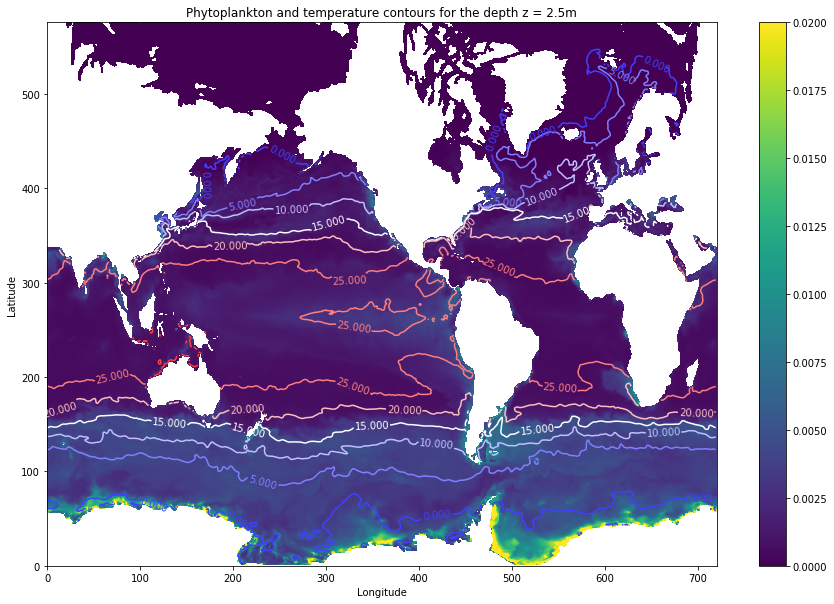

In [7]:
# On how to put contour lines over color maps
import matplotlib.cm as cm
plt.figure(figsize = (15,10)) #Changes the size of the figure, larger map makes it easier to see data
im = plt.pcolormesh(phyto.phyc.isel(time = 0, z_l =0)) # colors map using phytoplankton data
im.set_clim([0, 0.02])
# im = plt.contourf(phyto.phyc.isel(time = 0, z_l = 0)) # Uses filled contour lines as maps, looks smooth. 
# You choose pcolormesh or contourf
a = plt.contour(temp.thetao.isel(time = 0, z_l =0), cmap = plt.cm.bwr) # makes contours lines, sets the color as scales of red to white to blue.
plt.clabel(a, inline = 1, fontsize = 10)
plt.colorbar(im)
plt.title('Phytoplankton and temperature contours for the depth z = 2.5m')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


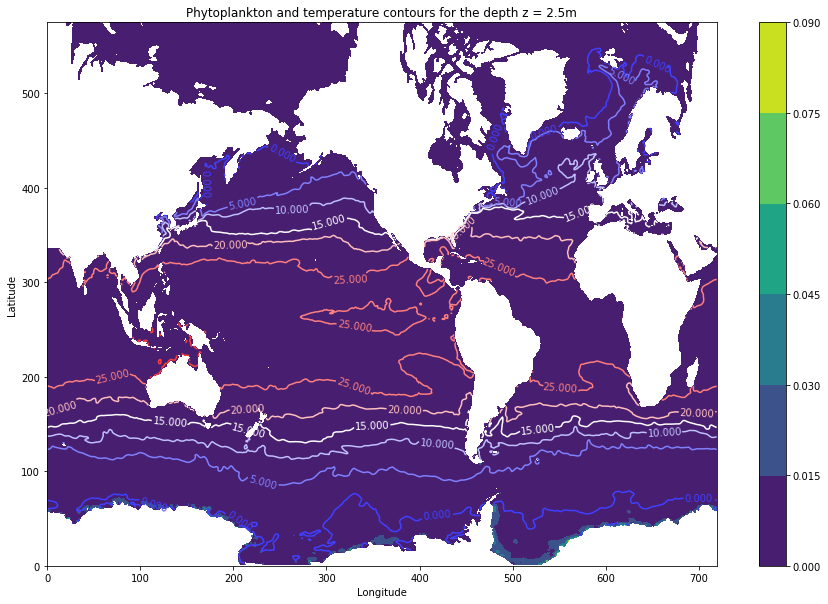

In [7]:
plt.figure(figsize = (15,10)) #Changes the size of the figure, larger map makes it easier to see data
# im = plt.pcolormesh(phyto.phyc.isel(time = 0, z_l =0)) # colors map using phytoplankton data
im = plt.contourf(phyto.phyc.isel(time = 0, z_l = 0)) # Uses filled contour lines as maps, looks smooth. 
# You choose pcolormesh or contourf
a = plt.contour(temp.thetao.isel(time = 0, z_l =0), cmap = plt.cm.bwr) # makes contours for 
plt.clabel(a, inline = 1, fontsize = 10)
plt.colorbar(im)
plt.title('Phytoplankton and temperature contours for the depth z = 2.5m')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

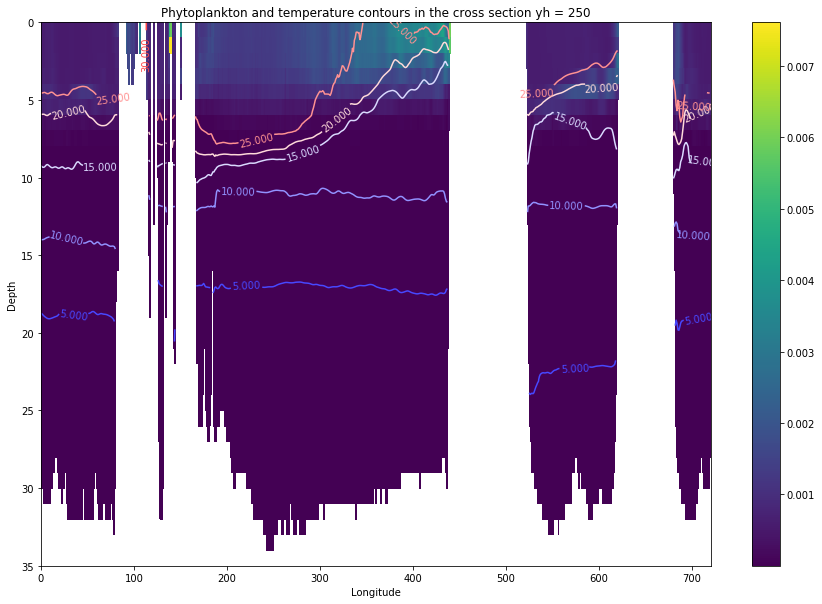

In [8]:
# Try to look at cross-section along a latitude (yh = 250)
plt.figure(figsize = (15,10)) #Changes the size of the figure to better see the data
im = plt.pcolormesh(phyto.phyc.isel(time = 0, yh =250 )) # uses pcolormesh
# im = plt.contourf(phyto.phyc.isel(time = 0, yh =250)) # uses contour
plt.gca().invert_yaxis() # invert the y-axis, surface is on top.
a = plt.contour(temp.thetao.isel(time = 0, yh= 250), cmap = plt.cm.bwr) #contour
plt.clabel(a, inline=1, fontsize = 10) 
plt.colorbar(im)
plt.title('Phytoplankton and temperature contours in the cross section yh = 250')
plt.xlabel('Longitude')
plt.ylabel('Depth')
plt.show()

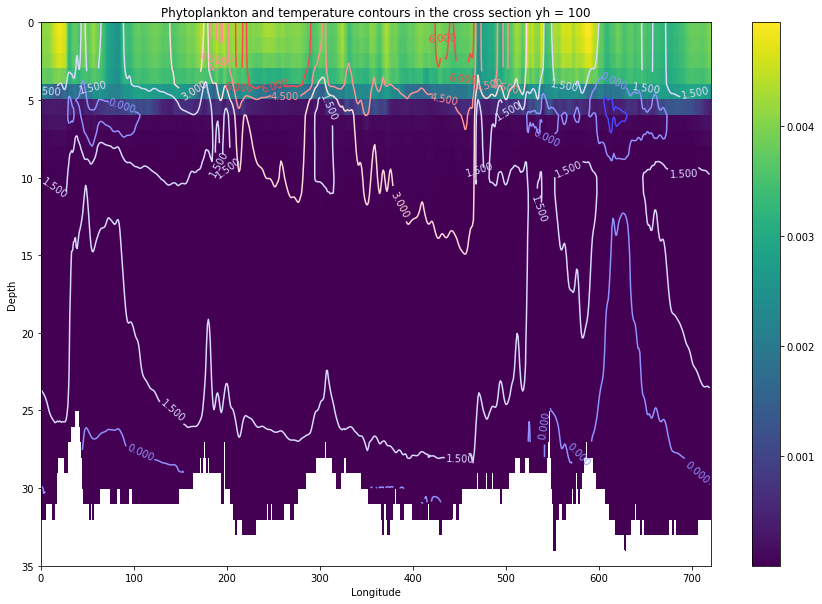

In [9]:
# Try to look at cross-section along a latitude (yh = 100)
plt.figure(figsize = (15,10)) #Changes the size of the figure to better see the data
im = plt.pcolormesh(phyto.phyc.isel(time = 0, yh =100 )) # uses pcolormesh
# im = plt.contourf(phyto.phyc.isel(time = 0, yh =100)) # uses contourf
plt.gca().invert_yaxis() # invert the y-axis, surface is on top.
a = plt.contour(temp.thetao.isel(time = 0, yh= 100), cmap = plt.cm.bwr) #contour
plt.clabel(a, inline=1, fontsize = 10) 
plt.colorbar(im)
plt.title('Phytoplankton and temperature contours in the cross section yh = 100')
plt.xlabel('Longitude')
plt.ylabel('Depth')
plt.show()

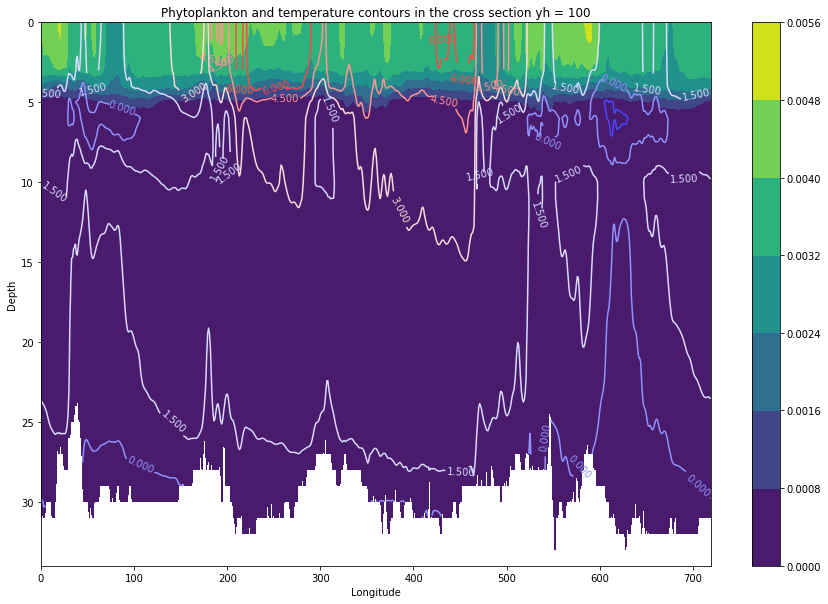

In [10]:
# Try to look at cross-section along a latitude (yh = 100)
plt.figure(figsize = (15,10)) #Changes the size of the figure to better see the data
# im = plt.pcolormesh(phyto.phyc.isel(time = 0, yh =100 )) # uses pcolormesh
im = plt.contourf(phyto.phyc.isel(time = 0, yh =100)) # uses contourf
plt.gca().invert_yaxis() # invert the y-axis, surface is on top.
a = plt.contour(temp.thetao.isel(time = 0, yh= 100), cmap = plt.cm.bwr) #contour
plt.clabel(a, inline=1, fontsize = 10) 
plt.colorbar(im)
plt.title('Phytoplankton and temperature contours in the cross section yh = 100')
plt.xlabel('Longitude')
plt.ylabel('Depth')
plt.show()

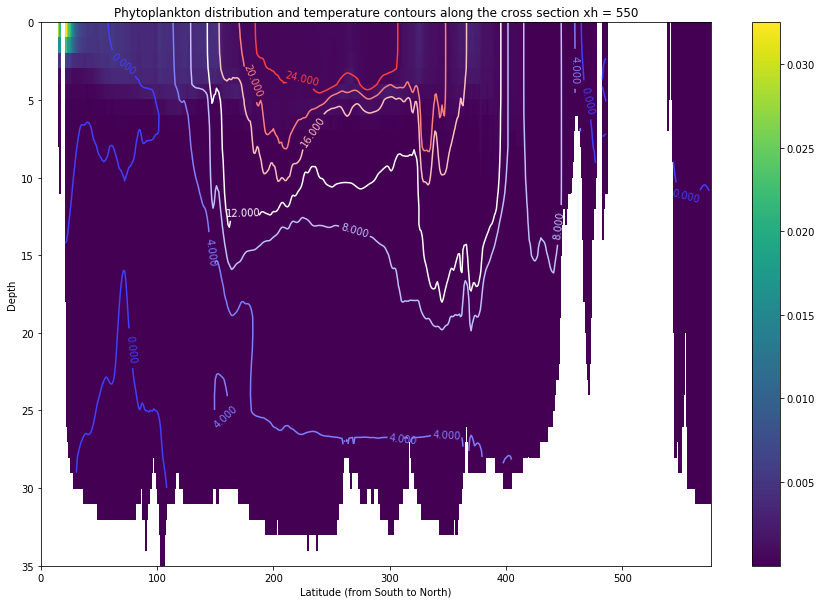

In [11]:
# Looking at a cross-section of longitude (xh = 550)
plt.figure(figsize = (15,10)) #Changes the size of the figure to better see the data
im = plt.pcolormesh(phyto.phyc.isel(time = 0, xh =550 ))
# im = plt.contourf(phyto.phyc.isel(time=0 , xh = 550))
plt.gca().invert_yaxis()
a = plt.contour(temp.thetao.isel(time = 0, xh= 550), cmap = plt.cm.bwr)
plt.clabel(a, inline=1, fontsize = 10)
plt.colorbar(im)
plt.title('Phytoplankton distribution and temperature contours along the cross section xh = 550')
plt.xlabel('Latitude (from South to North)')
plt.ylabel('Depth')
plt.show()

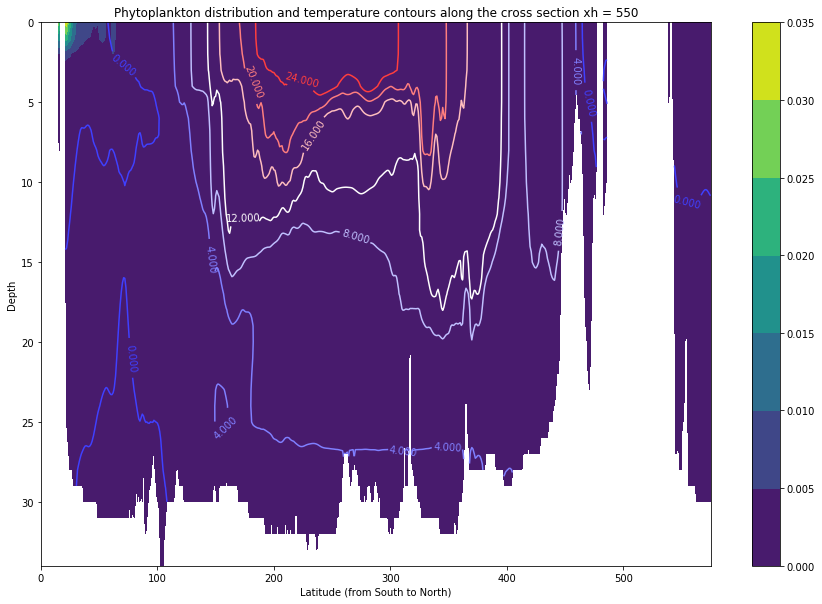

In [12]:
# Looking at a cross-section of longitude (xh = 550)
plt.figure(figsize = (15,10)) #Changes the size of the figure to better see the data
# im = plt.pcolormesh(phyto.phyc.isel(time = 0, xh =550 ))
im = plt.contourf(phyto.phyc.isel(time=0 , xh = 550))
plt.gca().invert_yaxis()
a = plt.contour(temp.thetao.isel(time = 0, xh= 550), cmap = plt.cm.bwr)
plt.clabel(a, inline=1, fontsize = 10)
plt.colorbar(im)
plt.title('Phytoplankton distribution and temperature contours along the cross section xh = 550')
plt.xlabel('Latitude (from South to North)')
plt.ylabel('Depth')
plt.show()

In [13]:
# Could use as the basis for looping through time or depth. 
# There could be some tweeks to this, but I hope this helps a lot. 